In [ ]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random
import operator
import math
import numpy as np
import librosa
import pandas as pd

ModuleNotFoundError: No module named 'python_speech_features'

In [ ]:
directory = "/content/drive/MyDrive/newdataset/"
dataset = []
i=0
for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break
    for file in os.listdir(directory+folder):
        (audio,rate) = librosa.load(directory+folder+"/"+file)
        mfcc_feat = librosa.feature.mfcc(y=audio,sr= rate, n_mfcc=13)
        mean_matrix = np.mean(mfcc_feat.T, axis=0)
        dataset.append([mean_matrix,i])

In [ ]:
features_df= pd.DataFrame(dataset, columns=['features', 'class'])
features_df

,features,class
0,"[-252.39117, 171.63739, -31.085865, 48.15472, ...",1
1,"[-173.08192, 114.89133, -36.96473, 61.5936, 18...",1
2,"[-222.05914, 169.86995, -10.665684, 38.852516,...",1
3,"[-197.68622, 140.7507, -47.236492, 50.974995, ...",1
4,"[-172.26576, 119.0253, -31.717136, 59.28681, 2...",1
...,...,...
495,"[-81.53823, 11.896546, -21.763174, 24.974464, ...",4
496,"[-79.46634, 13.915859, -22.564901, 25.889603, ...",4
497,"[-81.70809, 12.319067, -21.75292, 25.340248, 0...",4
498,"[-81.26771, 12.717023, -21.278982, 25.09677, 0...",4


In [ ]:
df = features_df.sample(frac=1).reset_index(drop=True)
df.head()

,features,class
0,"[-122.885, 108.273056, 50.656902, 24.940742, 5...",3
1,"[-60.731228, 174.04611, -52.2449, 20.25392, 2....",2
2,"[-72.57567, 167.3665, -48.313477, 16.183874, 5...",2
3,"[-239.11711, 166.37465, -13.028942, 52.670906,...",1
4,"[-81.93475, 11.937327, -21.250551, 25.540907, ...",4


In [ ]:
X= np.array(df['features'].tolist())
y= np.array(df['class'].tolist())

In [ ]:
y= np.array(pd.get_dummies(y))
y.shape

(500, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 , random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_label=y.shape[1]
num_label

4

In [ ]:
model= Sequential()

model.add(Dense(100, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 100)               1400      
                                                                 
 activation_48 (Activation)  (None, 100)               0         
                                                                 
 dropout_61 (Dropout)        (None, 100)               0         
                                                                 
 dense_117 (Dense)           (None, 200)               20200     
                                                                 
 activation_49 (Activation)  (None, 200)               0         
                                                                 
 dropout_62 (Dropout)        (None, 200)               0         
                                                                 
 dense_118 (Dense)           (None, 100)             

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
X_train.shape

(400, 13)

In [ ]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)


Number of samples for Train set : 360
Number of samples for Validation set : 90
Number of samples for Test set : 50
Shape of X Train (360, 13, 1)
Shape of X Test (50, 13)


In [ ]:
CNN1D_Model = Sequential()
CNN1D_Model.add(
    Conv1D(
        256,
        5,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(xTrain.shape[1], 1),
    )
)
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=4, activation="softmax"))
CNN1D_Model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 13, 256)           1536      
                                                                 
 batch_normalization_6 (Bat  (None, 13, 256)           1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 7, 256)            0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 7, 256)            327936    
                                                                 
 dropout_64 (Dropout)        (None, 7, 256)            0         
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 4, 256)          

In [ ]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
t0 = time.time()

CNN1D_Results = CNN1D_Model.fit(
    xTrain, yTrain, batch_size=64, epochs=250, validation_data=(xvalid, yvalid)
)

CNN1D_Model.save("Model2.h5")
print("CNN1D Model Saved")
train_hist_m2 = pd.DataFrame(CNN1D_Results.history)
train_m2 = round(time.time() - t0, 3)

Epoch 1/250
6/6 [==============================] - 3s 161ms/step - loss: 1.1744 - accuracy: 0.4778 - val_loss: 0.7962 - val_accuracy: 0.7333
Epoch 2/250
6/6 [==============================] - 1s 105ms/step - loss: 0.6869 - accuracy: 0.7139 - val_loss: 0.7158 - val_accuracy: 0.5667
Epoch 3/250
6/6 [==============================] - 1s 92ms/step - loss: 0.6506 - accuracy: 0.7722 - val_loss: 1.2019 - val_accuracy: 0.5222
Epoch 4/250
6/6 [==============================] - 1s 95ms/step - loss: 0.4886 - accuracy: 0.7694 - val_loss: 0.7810 - val_accuracy: 0.6556
Epoch 5/250
6/6 [==============================] - 1s 100ms/step - loss: 0.3860 - accuracy: 0.8250 - val_loss: 0.7197 - val_accuracy: 0.5333
Epoch 6/250
6/6 [==============================] - 1s 104ms/step - loss: 0.2752 - accuracy: 0.9000 - val_loss: 0.5926 - val_accuracy: 0.7667
Epoch 7/250
6/6 [==============================] - 1s 103ms/step - loss: 0.1863 - accuracy: 0.9194 - val_loss: 0.6046 - val_accuracy: 0.6444
Epoch 8/250
6/6

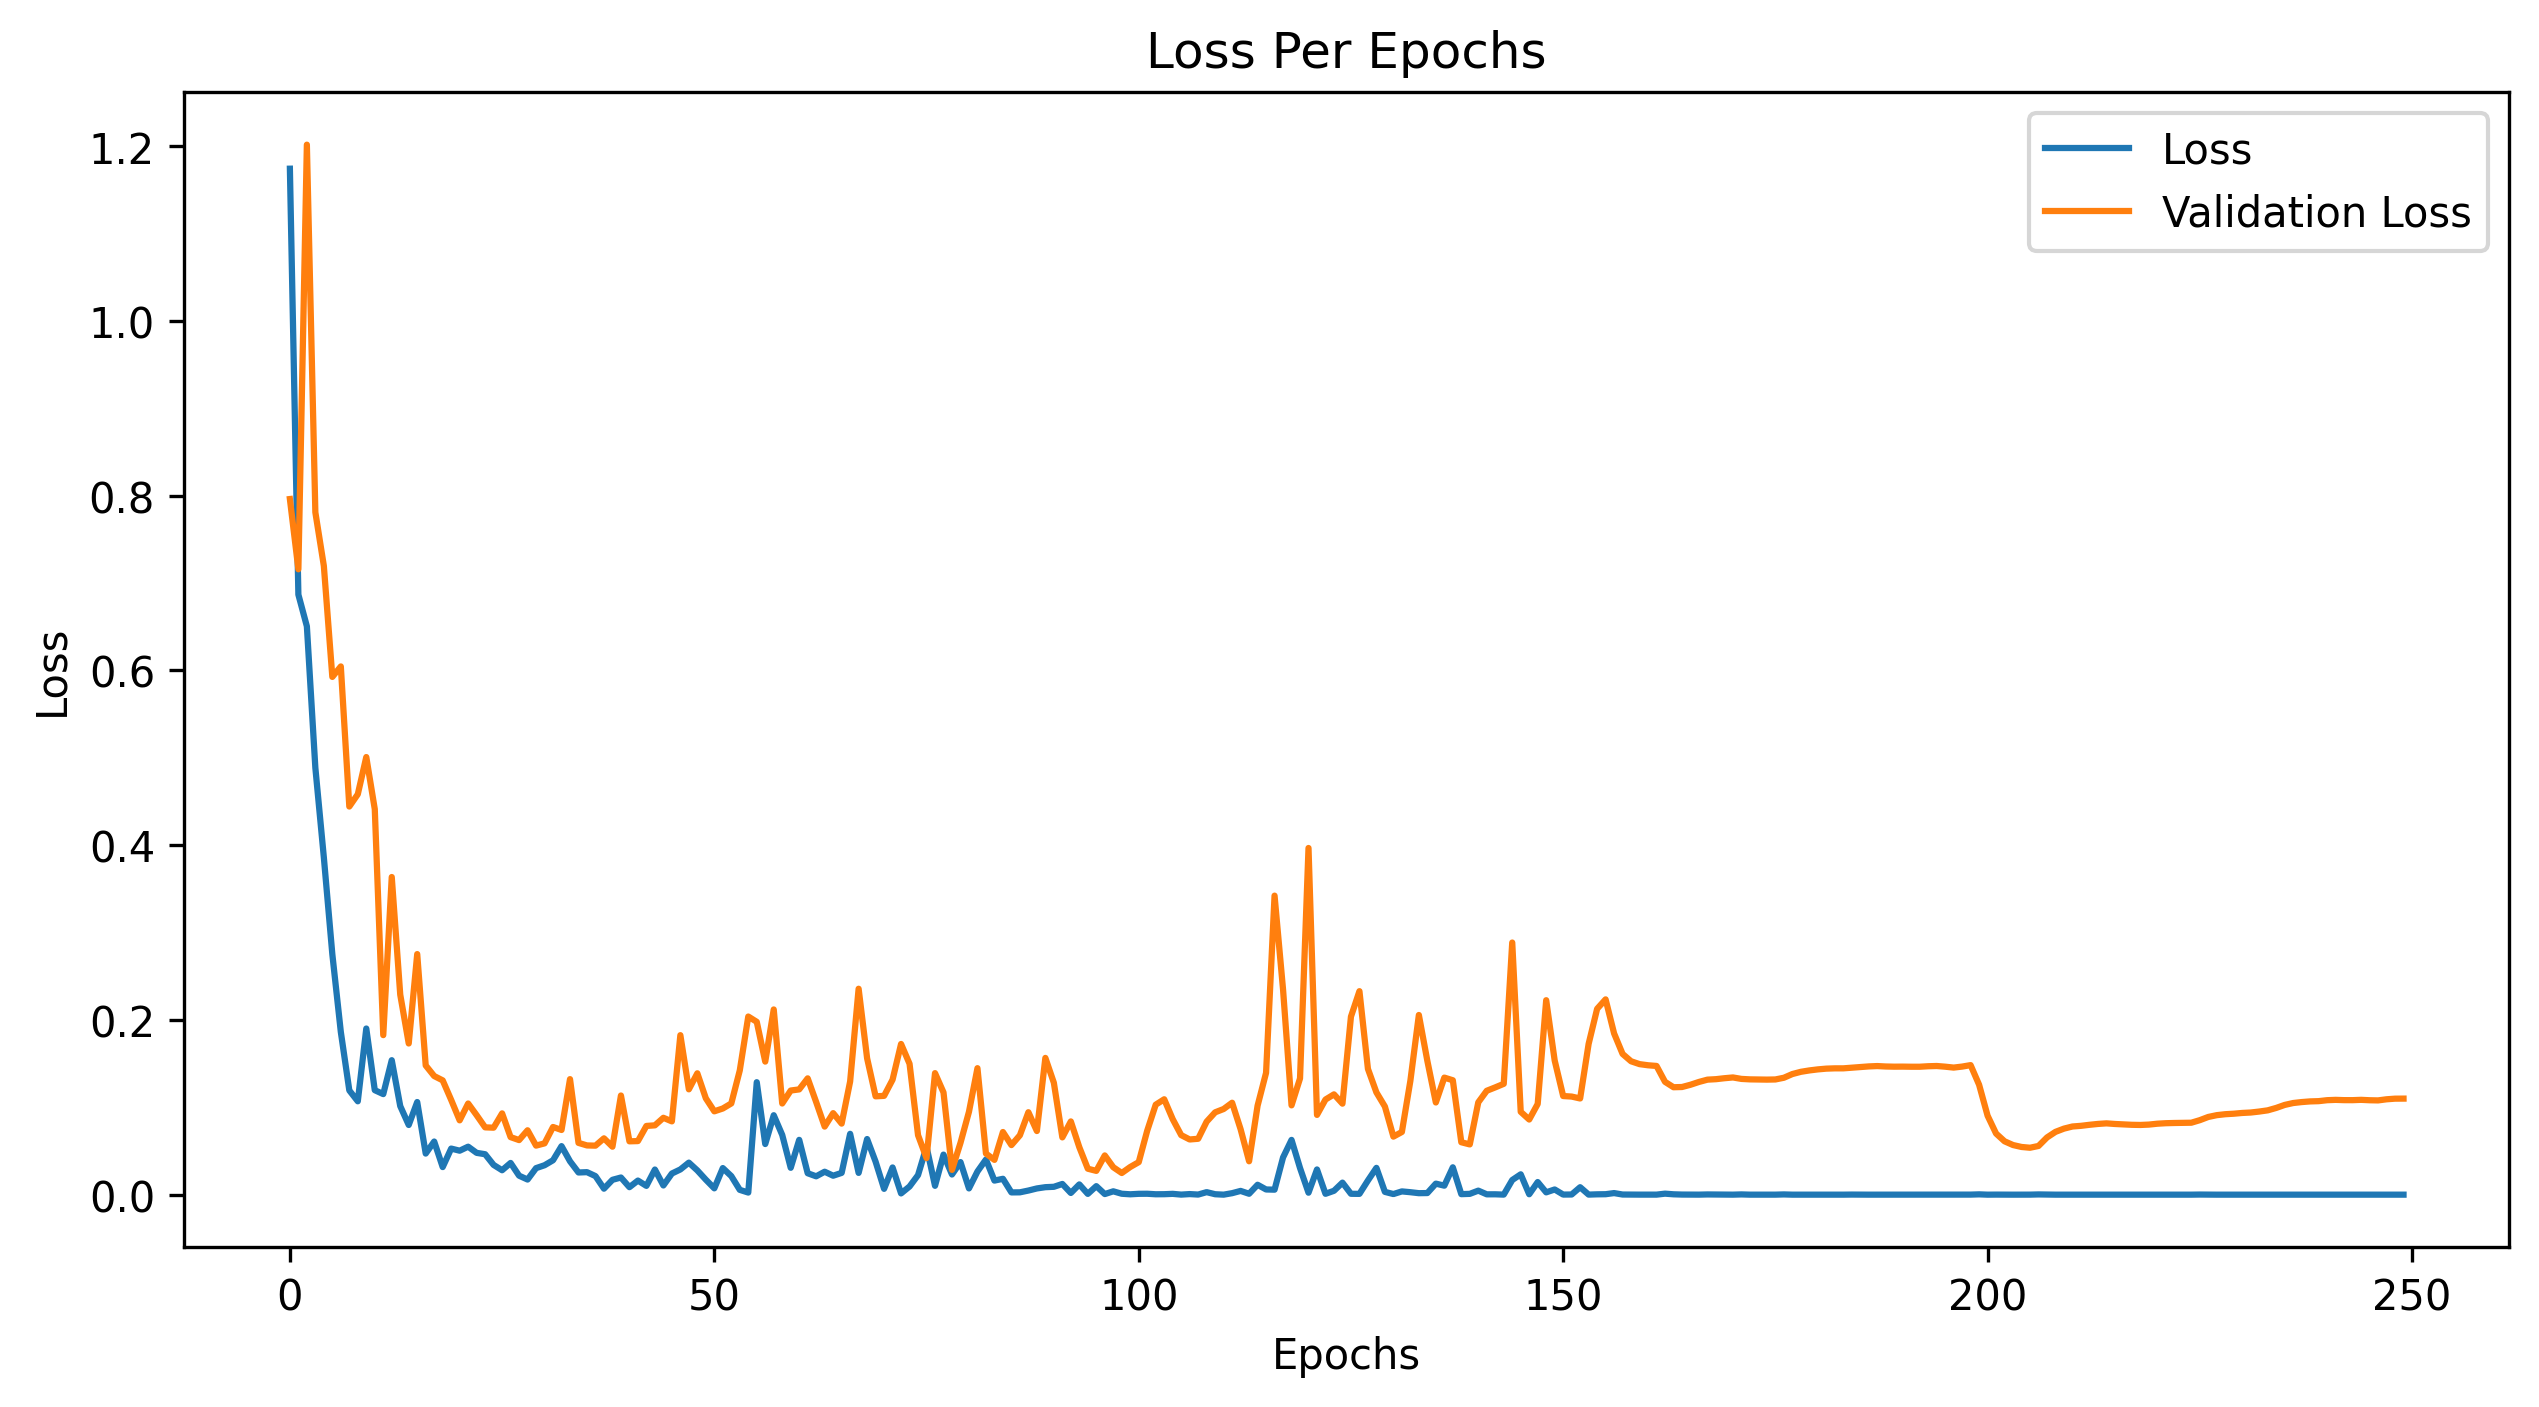

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

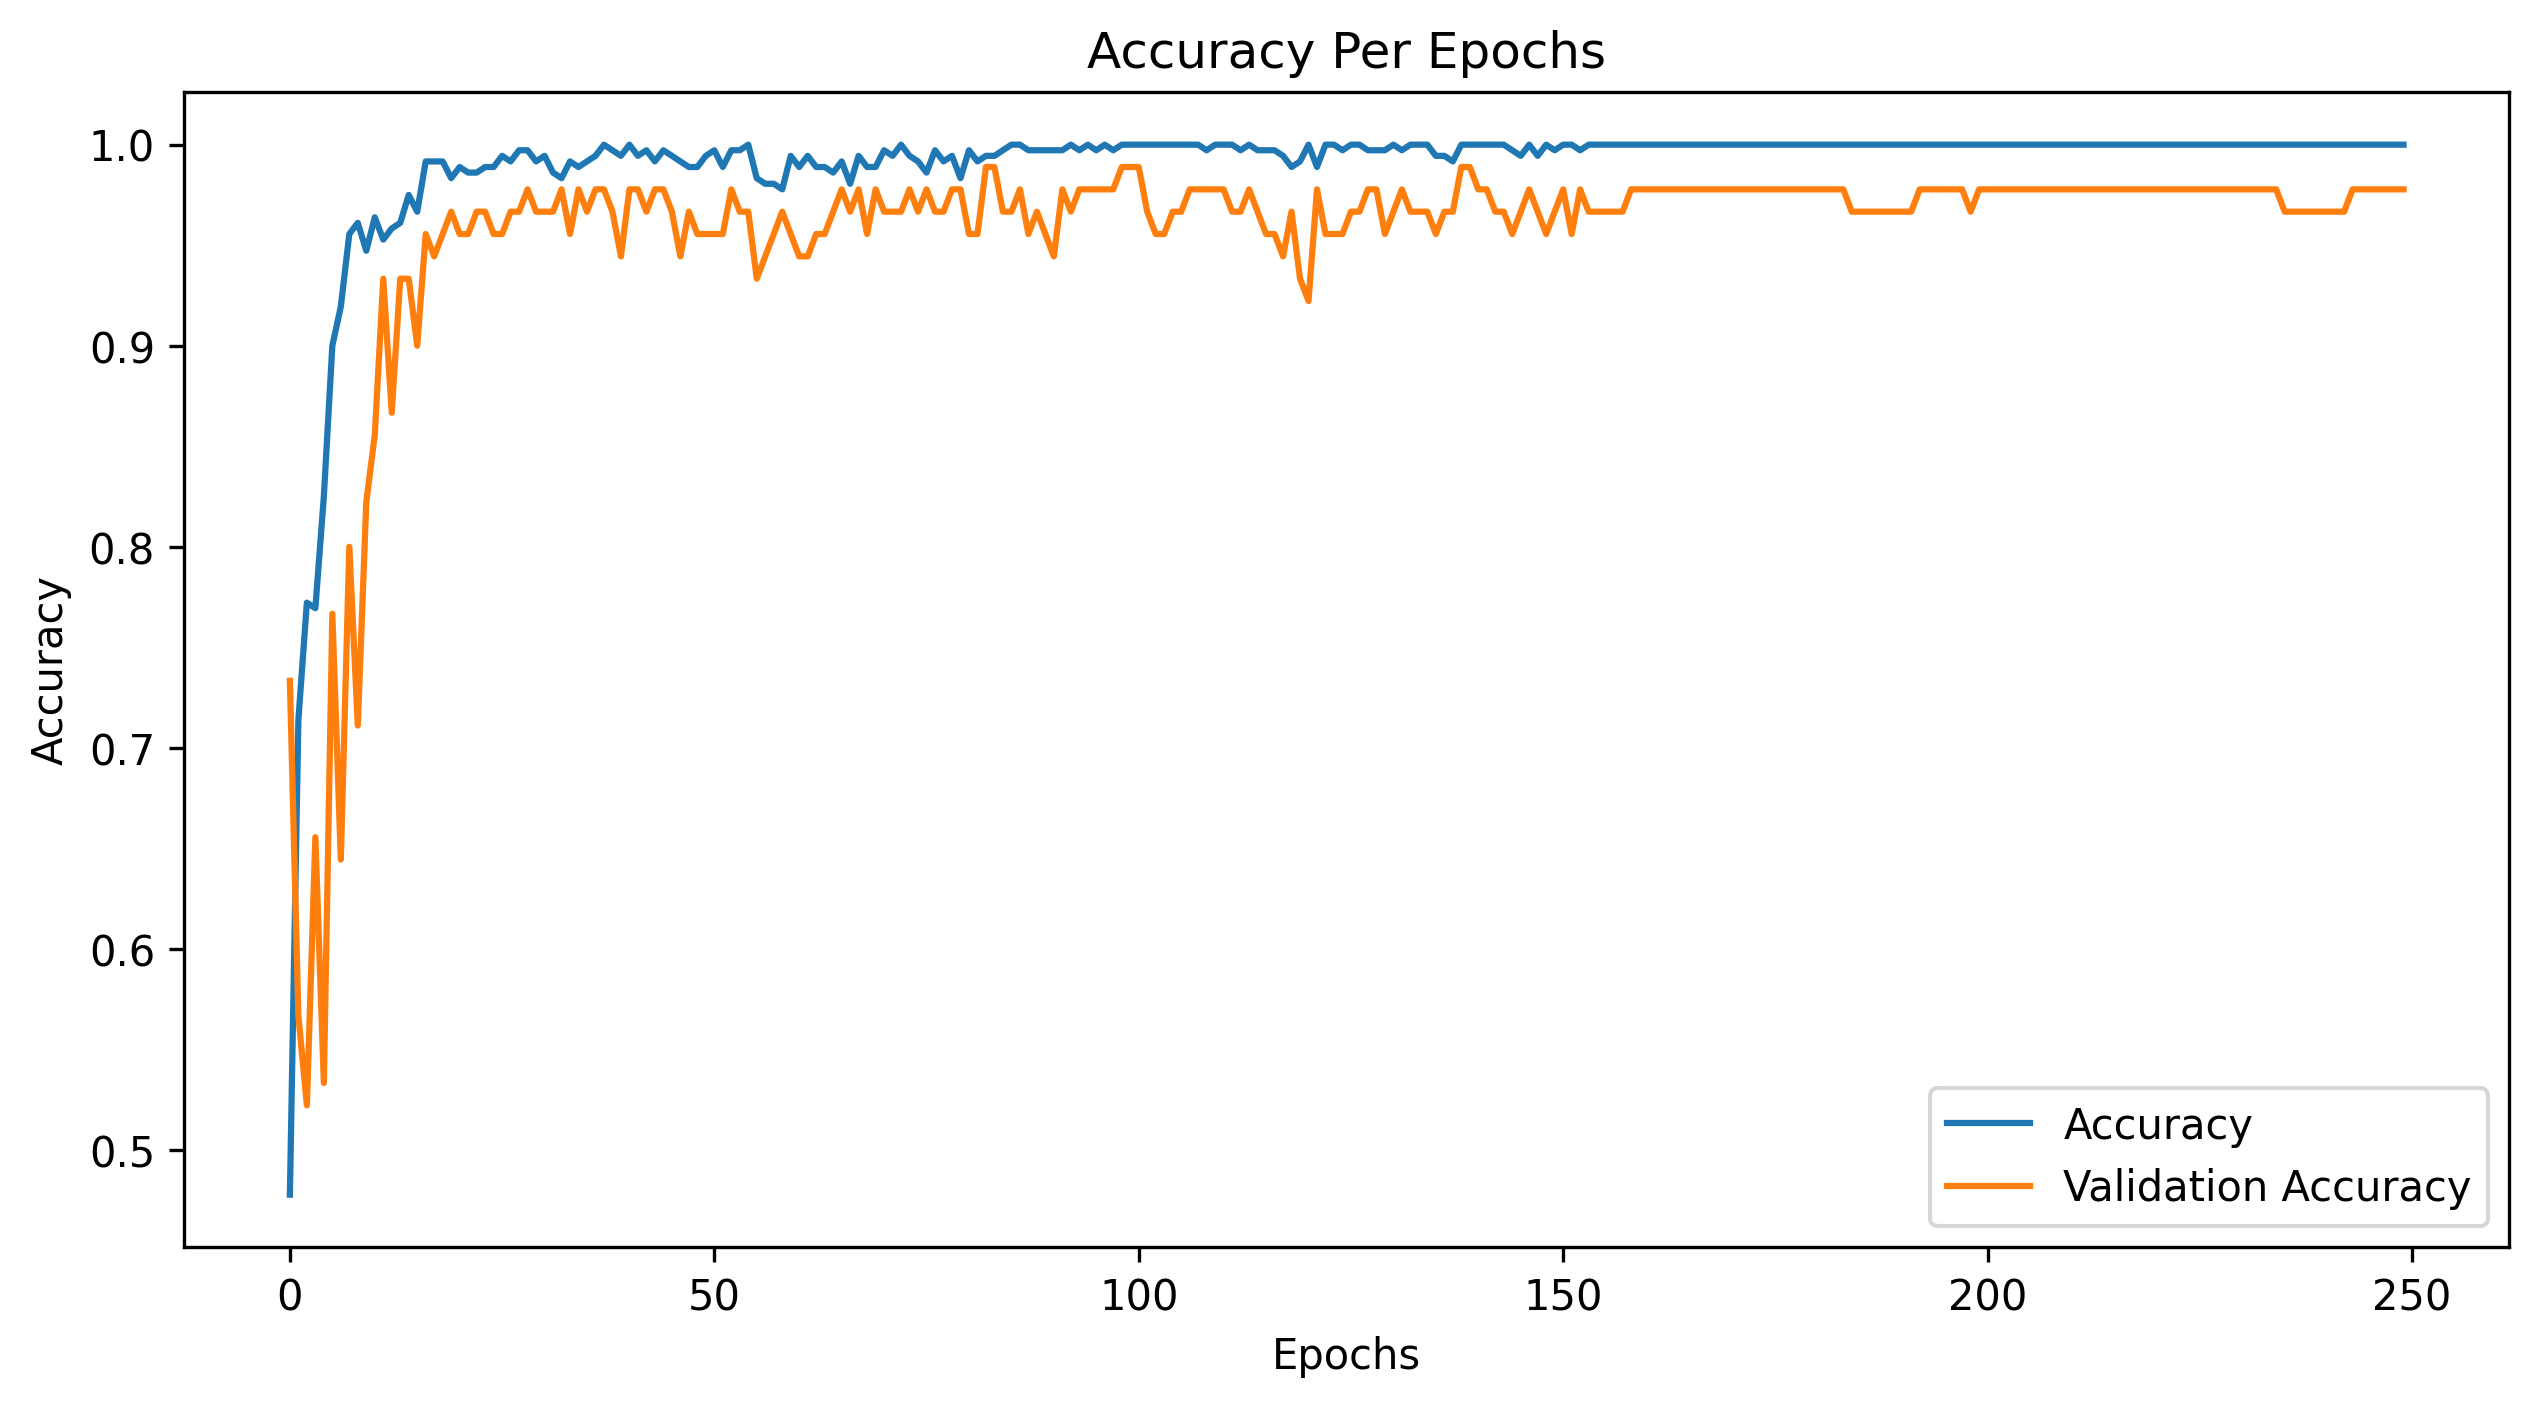

In [ ]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
test_accuracy=  CNN1D_Model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

1.0


In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
import resampy
import pydot
import cartopy
#from sounddevice import play
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [ ]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [ ]:
acc_m2 = CNN1D_Model.evaluate(xvalid, yvalid, verbose=0)
t0 = time.time()
y_pred_m2 = CNN1D_Model.predict(xvalid, verbose=0)
pred_m2 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["CNN1D", acc_m2[1] * 100, train_m2, pred_m2]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)

In [ ]:
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=1)
    # get the class label from class id
    #predicted_class = le.inverse_transform(predicted_vector)
    # display the result

    #predictions = ANN_Model.predict(prediction_feature)
   # predicted_labels = np.argmax(predictions, axis=1)
    print("ANN has predicted the class as  --> ", predicted_vector[0])



In [ ]:
file_name = "/content/drive/MyDrive/newdataset/fold1/25th_Huey_Helicopter_no_music_01.wav"


In [ ]:

!pip install resampy
import librosa
audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")

ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /usr/local/lib/python3.10/dist-packages/librosa/core/audio.py, line 32, in <module>

----> resampy = lazy.load("resampy")